In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import pandas_datareader.data as pdr
import scipy.stats as stats

In [21]:
yf.pdr_override()

start = datetime.strptime('2017-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-05-03', '%Y-%m-%d')

spy = pdr.DataReader('SPY', start, end , data_source='yahoo')["Close"]
tsla = pdr.DataReader('TSLA', start, end , data_source='yahoo')["Close"]
btc = pdr.DataReader('BTC-USD', start, end , data_source='yahoo')["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


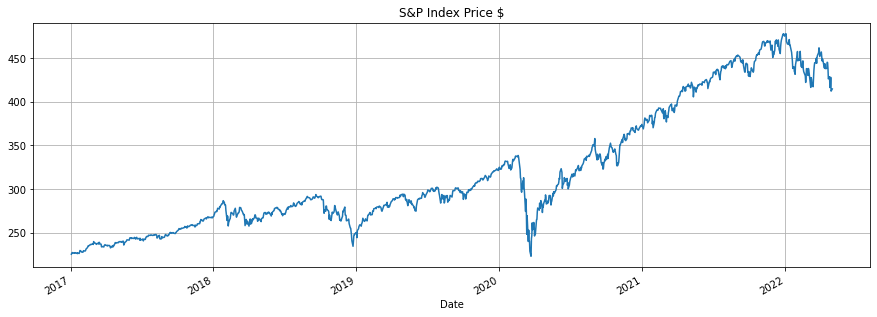

In [22]:
spy.plot(figsize=(15,5), title = "S&P Index Price $")
plt.grid(True)

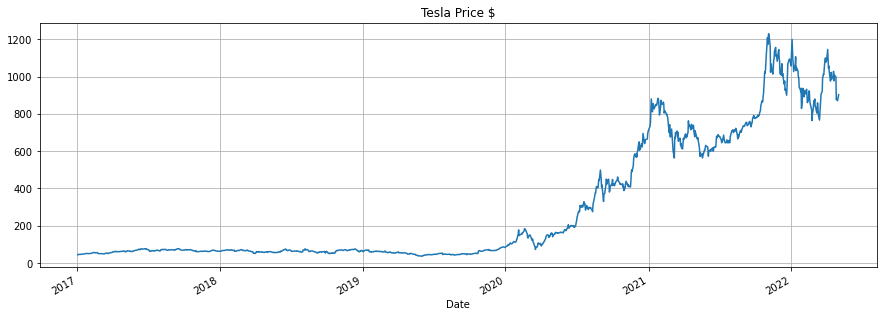

In [23]:
tsla.plot(figsize=(15,5), title = "Tesla Price $")
plt.grid(True)

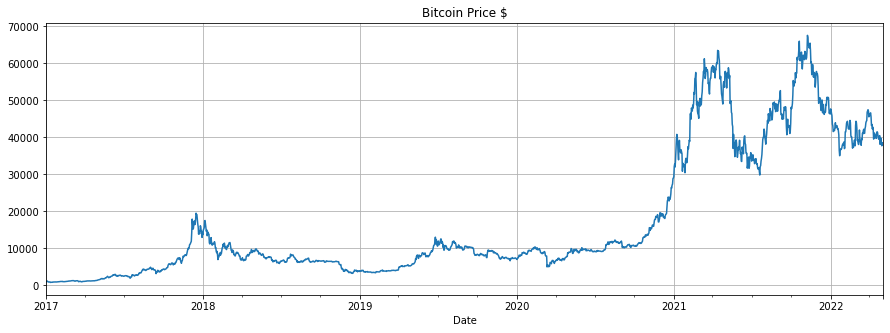

In [24]:
btc.plot(figsize=(15,5), title = "Bitcoin Price $")
plt.grid(True)

In [25]:
data = pd.concat([spy, tsla, btc],axis=1).dropna()
data.columns = ["S&P", "Tesla", "Bitcoin"]
N = len(data.columns)
data

,S&P,Tesla,Bitcoin
Date,,,
2017-01-03,225.240005,43.397999,1043.839966
2017-01-04,226.580002,45.397999,1154.729980
2017-01-05,226.399994,45.349998,1013.380005
2017-01-06,227.210007,45.801998,902.200989
2017-01-09,226.460007,46.256001,902.828003
...,...,...,...
2022-04-26,416.100006,876.419983,38117.460938
2022-04-27,417.269989,881.510010,39241.121094
2022-04-28,427.809998,877.510010,39773.828125


In [26]:
log_rets = np.log(data/data.shift(1)).dropna()
log_rets

,S&P,Tesla,Bitcoin
Date,,,
2017-01-04,0.005932,0.045055,0.100960
2017-01-05,-0.000795,-0.001058,-0.130575
2017-01-06,0.003571,0.009918,-0.116209
2017-01-09,-0.003306,0.009863,0.000695
2017-01-10,0.000000,-0.006115,0.005359
...,...,...,...
2022-04-26,-0.029388,-0.129928,-0.059600
2022-04-27,0.002808,0.005791,0.029053
2022-04-28,0.024946,-0.004548,0.013484


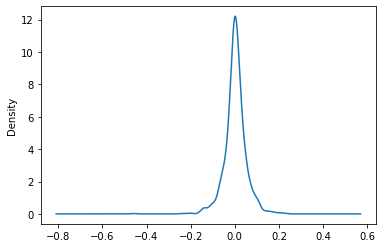

In [27]:
log_rets["Bitcoin"].plot(kind = "kde")

In [28]:
log_rets_cov = log_rets.cov()
log_rets_cov

,S&P,Tesla,Bitcoin
S&P,0.000147,0.000208,0.000129
Tesla,0.000208,0.001465,0.000241
Bitcoin,0.000129,0.000241,0.002410


In [29]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

$E[R_{p}] = w_{1}*E[R_{1}] + w_{2}*E[R_{2}] + w_{3}*E[R_{3}]$

In [30]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean() * weights) * 252 #Annualized Returns

$Cov = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix},
w = \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$Cov * w$

$ = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$

$ = \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$w^{T} * Cov * w$

$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$ = w_{1}^{2} * var(R_{1}) + w_{1} * w_{2} * cov(R_{1}, R_{2}) + w_{1} * w_{3} * cov(R_{1}, R_{3}) + \\
    w_{2} * w_{1} * cov(R_{2}, R_{1}) + w_{2}^{2} * var(R_{2}) + w_{2} * w_{3} * cov(R_{2}, R_{3}) + \\
    w_{3} * w_{1} * cov(R_{3}, R_{1}) + w_{3} * w_{2} * cov(R_{3}, R_{2}) + w_{3}^{2} * var(R_{3})$
    
$ = w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})$

$\sigma_{p} = \sqrt{w^{T} * Cov * w}$

$ = \sqrt{w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})}$

In [31]:
def calculate_volatility(weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov * 252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [32]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(10000):
    weights = gen_weights(N)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights, log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights, log_rets_cov))

In [33]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

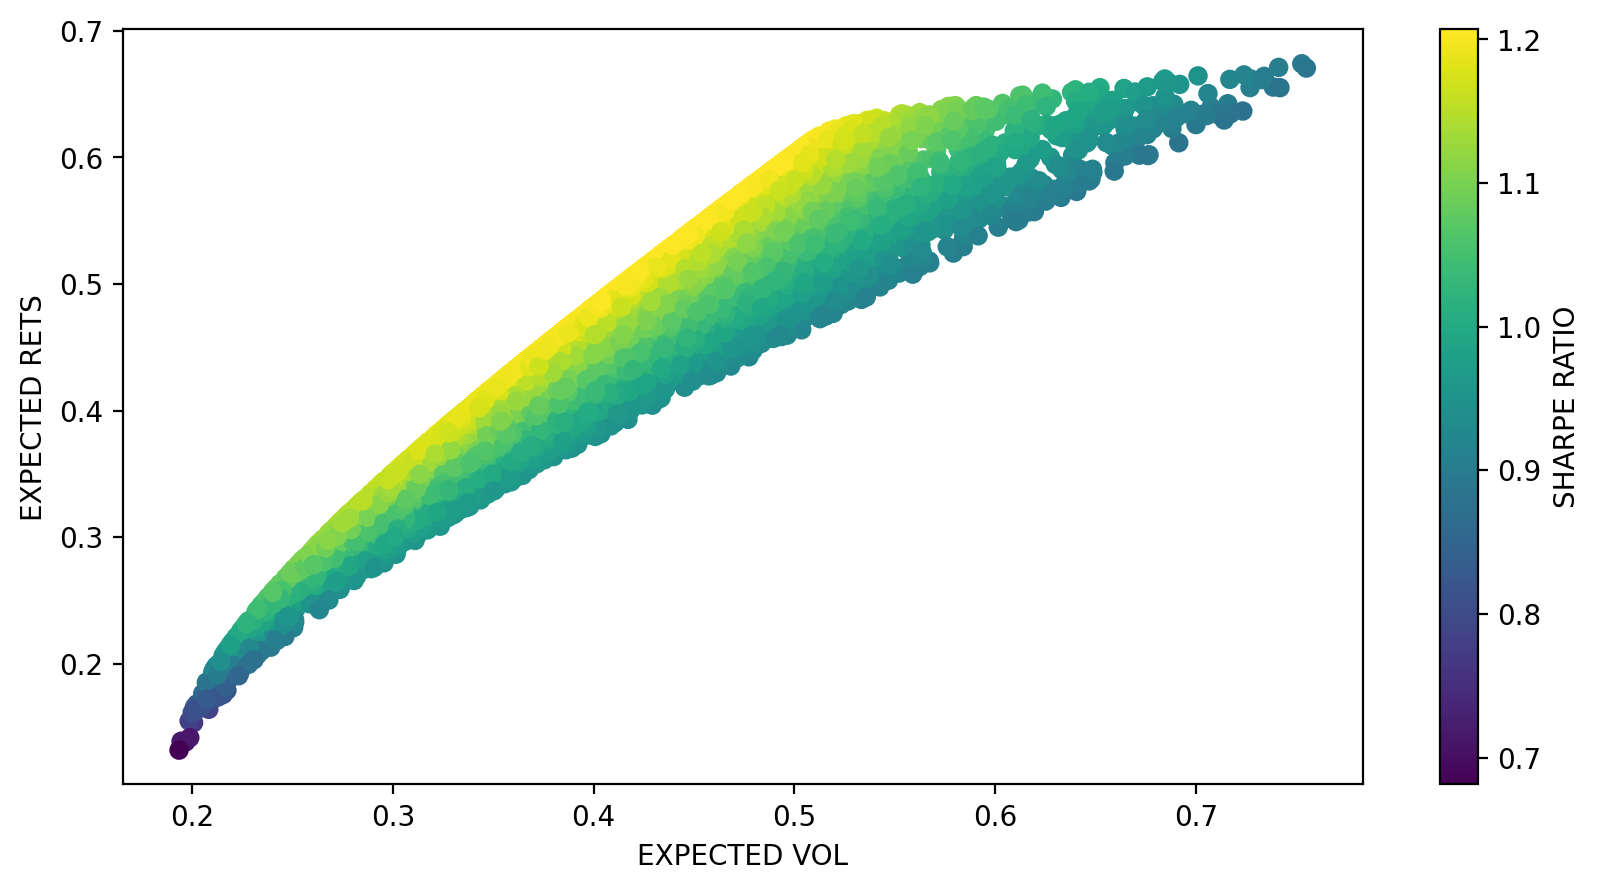

In [34]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTED RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [35]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.14454114, 0.49705619, 0.35840267])

In [36]:
from scipy.optimize import minimize

In [37]:
def function_to_minimize(weights):
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [38]:
equal_weights = N * [1/N]
bounds = tuple((0,1) for n in range(N))
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [39]:
minimize(fun = function_to_minimize, x0 = equal_weights, bounds = bounds, constraints = sum_constraint)

     fun: -1.206870740241314
     jac: array([ 4.12806869e-04,  1.04308128e-07, -1.58727169e-04])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.13867078, 0.50030747, 0.36102175])

In [40]:
expected_returns_range = np.linspace(0.2,0.7,100)

In [41]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [42]:
# redefine calculate_volatility because scipy.optimize.minimize
# only takes one input (weights) for now 

def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [43]:
frontier_volatility = []
for possible_return in expected_returns_range:
    result = minimize(calculate_volatility, equal_weights, bounds = bounds, constraints = constraints)
    frontier_volatility.append(result['fun'])

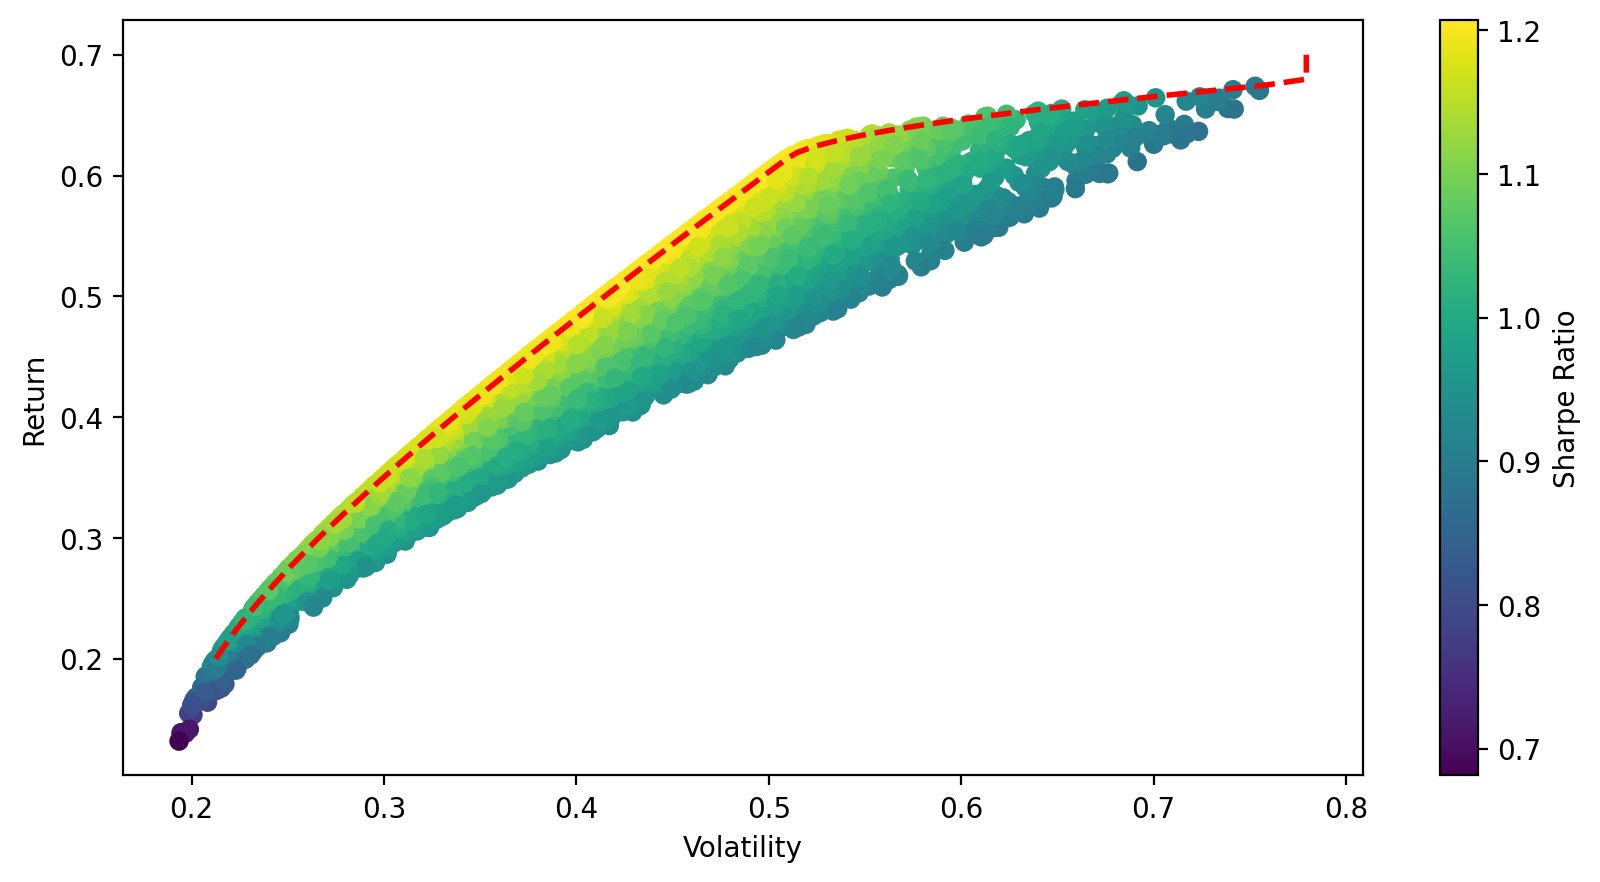

In [44]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)